In [101]:
import numpy as np
import pandas as pd

from ipywidgets import widgets

import matplotlib.pyplot as plt

from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import MDS,TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import re

import cufflinks as cf

cf.go_offline()

In [4]:
df = pd.read_csv("C:/Users/MX03932000/Documents/Personales/Mod_3/p3/pokemon (1).csv")

In [5]:
def completitud(df):
    comple=pd.DataFrame(df.isnull().sum())
    comple.reset_index(inplace=True)
    comple=comple.rename(columns={"index":"columna",0:"total"})
    comple["completitud"]=(1-comple["total"]/df.shape[0])*100
    comple=comple.sort_values(by="completitud",ascending=True)
    comple.reset_index(drop=True,inplace=True)
    return comple

In [6]:
completitud(df)

,columna,total,completitud
0,type2,384,52.059925
1,percentage_male,98,87.765293
2,weight_kg,20,97.503121
3,height_m,20,97.503121
4,abilities,0,100.000000
5,base_total,0,100.000000
6,capture_rate,0,100.000000
7,classfication,0,100.000000
8,defense,0,100.000000
9,experience_growth,0,100.000000


In [7]:
#checamos que no existan duplicados.
df.duplicated().sum()

0

In [8]:
df.name.duplicated().sum()

0

In [9]:
#'abilities','classfication'(number_classfication),
for col in df:
    print(col)
    display(df[col].astype(str).value_counts())

abilities


['Levitate']                                        29
['Beast Boost']                                      7
['Shed Skin']                                        5
['Poison Point', 'Rivalry', 'Hustle']                4
['Justified']                                        4
                                                    ..
['Natural Cure', 'Serene Grace', 'Friend Guard']     1
['Soul-Heart']                                       1
['Battle Armor']                                     1
['Keen Eye', 'Reckless']                             1
['Innards Out', 'Unaware']                           1
Name: abilities, Length: 482, dtype: int64

against_bug


1.0     376
0.5     247
2.0     128
0.25     42
4.0       8
Name: against_bug, dtype: int64

against_dark


1.0     565
0.5     126
2.0     105
0.25      3
4.0       2
Name: against_dark, dtype: int64

against_dragon


1.0    669
0.0     47
2.0     43
0.5     42
Name: against_dragon, dtype: int64

against_electric


1.0     392
2.0     181
0.5     156
0.0      64
4.0       7
0.25      1
Name: against_electric, dtype: int64

against_fairy


1.0     541
0.5     145
2.0     103
4.0       9
0.25      3
Name: against_fairy, dtype: int64

against_fight


1.0     326
0.5     193
2.0     184
0.25     44
0.0      41
4.0      13
Name: against_fight, dtype: int64

against_fire


1.0     354
0.5     226
2.0     187
0.25     18
4.0      16
Name: against_fire, dtype: int64

against_flying


1.0     488
2.0     181
0.5     110
4.0      12
0.25     10
Name: against_flying, dtype: int64

against_ghost


1.0    536
2.0    112
0.0    109
0.5     42
4.0      2
Name: against_ghost, dtype: int64

against_grass


1.0     297
0.5     256
2.0     135
0.25     85
4.0      28
Name: against_grass, dtype: int64

against_ground


1.0     402
2.0     184
0.0      98
0.5      96
4.0      15
0.25      6
Name: against_ground, dtype: int64

against_ice


1.0     349
2.0     212
0.5     209
4.0      22
0.25      9
Name: against_ice, dtype: int64

against_normal


1.0     664
0.5      90
0.0      41
0.25      6
Name: against_normal, dtype: int64

against_poison


1.0     476
0.5     153
2.0     102
0.0      46
0.25     19
4.0       5
Name: against_poison, dtype: int64

against_psychic


1.0     539
0.5     105
2.0     102
0.0      46
0.25      7
4.0       2
Name: against_psychic, dtype: int64

against_rock


1.0     449
2.0     198
0.5     127
4.0      23
0.25      4
Name: against_rock, dtype: int64

against_steel


1.0     451
0.5     237
2.0     100
0.25      9
4.0       4
Name: against_steel, dtype: int64

against_water


1.0     426
0.5     229
2.0     129
4.0      12
0.25      5
Name: against_water, dtype: int64

attack


100    38
60     35
55     35
65     35
50     34
       ..
97      1
102     1
113     1
134     1
129     1
Name: attack, Length: 114, dtype: int64

base_egg_steps


5120     436
3840     140
6400      55
30720     49
10240     42
7680      26
2560      22
20480     16
8960      13
1280       2
Name: base_egg_steps, dtype: int64

base_happiness


70     667
35      69
0       36
100     14
140     10
90       5
Name: base_happiness, dtype: int64

base_total


405    26
600    26
500    21
300    21
580    20
       ..
409     1
481     1
255     1
190     1
313     1
Name: base_total, Length: 203, dtype: int64

capture_rate


45                          250
190                          75
255                          69
75                           61
3                            58
120                          55
60                           50
90                           38
30                           20
200                          19
225                          15
25                           13
180                          11
150                           7
50                            7
235                           7
100                           6
140                           6
127                           5
70                            4
125                           3
65                            3
55                            3
15                            2
220                           2
130                           2
170                           2
80                            2
155                           1
205                           1
145                           1
30 (Mete

classfication


Dragon Pokémon      8
Mouse Pokémon       6
Mushroom Pokémon    6
Fox Pokémon         5
Flame Pokémon       5
                   ..
Sleeping Pokémon    1
Swallow Pokémon     1
Flailing Pokémon    1
Catty Pokémon       1
Rock Inn Pokémon    1
Name: classfication, Length: 588, dtype: int64

defense


50     51
70     49
60     46
80     41
40     39
       ..
98      1
97      1
102     1
184     1
129     1
Name: defense, Length: 109, dtype: int64

experience_growth


1000000    335
1059860    202
1250000    172
800000      56
600000      22
1640000     14
Name: experience_growth, dtype: int64

height_m


0.6     70
0.5     60
0.4     59
1.0     57
0.3     53
1.2     49
1.5     43
0.8     43
0.7     37
1.1     36
0.9     32
1.3     29
1.4     28
1.6     25
1.7     23
1.8     21
2.0     21
nan     20
0.2     17
1.9     13
2.1      8
2.2      6
2.5      5
0.1      5
2.3      3
2.4      3
3.0      3
4.5      2
3.5      2
4.0      2
9.2      2
3.8      2
3.2      2
2.7      2
6.5      1
2.8      1
5.4      1
5.5      1
4.2      1
7.0      1
3.4      1
5.0      1
5.2      1
8.8      1
3.9      1
5.8      1
14.5     1
3.3      1
6.2      1
2.9      1
3.7      1
2.6      1
Name: height_m, dtype: int64

hp


60     68
70     55
50     54
75     44
65     44
       ..
92      1
101     1
190     1
81      1
31      1
Name: hp, Length: 99, dtype: int64

japanese_name


Kapu-tetefuカプ・テテフ                  1
Kolinkコリンク                         1
Enecoエネコ                           1
Minomadam (kusaki No Mino)ミノマダム    1
Namazunナマズン                        1
                                  ..
Archeosアーケオス                       1
Donmelドンメル                         1
Mogurewモグリュー                       1
Berobeltベロベルト                      1
Eifieエーフィ                          1
Name: japanese_name, Length: 801, dtype: int64

name


Diglett      1
Tauros       1
Togepi       1
Mewtwo       1
Shedinja     1
            ..
Sawk         1
Tapu Koko    1
Snover       1
Tyranitar    1
Mandibuzz    1
Name: name, Length: 801, dtype: int64

percentage_male


50.0     501
88.1     111
nan       98
0.0       27
24.6      24
75.4      19
100.0     19
11.2       2
Name: percentage_male, dtype: int64

pokedex_number


276    1
602    1
603    1
137    1
436    1
      ..
388    1
373    1
14     1
323    1
313    1
Name: pokedex_number, Length: 801, dtype: int64

sp_attack


40     52
60     48
65     43
50     42
55     38
       ..
39      1
126     1
41      1
175     1
129     1
Name: sp_attack, Length: 111, dtype: int64

sp_defense


50     53
60     44
65     42
55     42
80     41
       ..
33      1
126     1
32      1
94      1
128     1
Name: sp_defense, Length: 97, dtype: int64

speed


60     46
50     43
65     38
45     36
70     36
       ..
127     1
102     1
118     1
123     1
88      1
Name: speed, Length: 113, dtype: int64

type1


water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
ground       32
poison       32
dark         29
fighting     28
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

type2


nan         384
flying       95
poison       34
ground       34
fairy        29
psychic      29
fighting     25
steel        22
dark         21
grass        20
water        17
dragon       17
ice          15
rock         14
ghost        14
fire         13
electric      9
bug           5
normal        4
Name: type2, dtype: int64

weight_kg


nan      20
15.0      9
5.0       8
28.0      8
8.5       8
         ..
50.2      1
950.0     1
70.5      1
24.9      1
96.3      1
Name: weight_kg, Length: 422, dtype: int64

generation


5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: generation, dtype: int64

is_legendary


0    731
1     70
Name: is_legendary, dtype: int64

In [10]:
#tratamiento a variables con nulos 

In [11]:
df["type2"]=df["type2"].fillna("without type2")

In [12]:
df["percentage_male"]=df["percentage_male"].fillna(0)

In [13]:
df_weight_kg_mean=df["weight_kg"].mean()
df_height_m_mean=df["height_m"].mean()

In [14]:
df["weight_kg"]=df["weight_kg"].fillna(df_weight_kg_mean)

In [15]:
df["height_m"]=df["height_m"].fillna(df_height_m_mean)

In [16]:
df["capture_rate"]=df["capture_rate"].replace('30 (Meteorite)255 (Core)',30)

In [17]:
#ingenieria de variables categoricas

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [19]:
df['abilities'].unique()

array(["['Overgrow', 'Chlorophyll']", "['Blaze', 'Solar Power']",
       "['Torrent', 'Rain Dish']", "['Shield Dust', 'Run Away']",
       "['Shed Skin']", "['Compoundeyes', 'Tinted Lens']",
       "['Swarm', 'Sniper']", "['Keen Eye', 'Tangled Feet', 'Big Pecks']",
       "['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hustle', 'Thick Fat']",
       "['Keen Eye', 'Sniper']", "['Intimidate', 'Shed Skin', 'Unnerve']",
       "['Static', 'Lightningrod']",
       "['Static', 'Lightningrod', 'Surge Surfer']",
       "['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slush Rush']",
       "['Poison Point', 'Rivalry', 'Hustle']",
       "['Poison Point', 'Rivalry', 'Sheer Force']",
       "['Cute Charm', 'Magic Guard', 'Friend Guard']",
       "['Cute Charm', 'Magic Guard', 'Unaware']",
       "['Flash Fire', 'Drought', 'Snow Cloak', 'Snow Warning']",
       "['Cute Charm', 'Competitive', 'Friend Guard']",
       "['Cute Charm', 'Competitive', 'Frisk']",
       "['Inner Focus', 'Infiltrator']", "['Chlor

In [20]:
#eliminamos name y japanese_name por ser variables de identificación.
df=df.drop(columns=['name','japanese_name','pokedex_number'])

In [21]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'percentage_male', 'sp_attack', 'sp_defense', 'speed', 'type1', 'type2',
       'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

In [22]:
df['abilities']=df['abilities'].map(lambda x: x.replace("["," ").replace("]"," "))

In [23]:
#convierte a lista, quita los corchetes y las comillas dobles
#M['abilities']=M['abilities'].map(lambda x: re.findall(r"'(.*?)'", x, re.DOTALL))

In [24]:
df['abilities']=df['abilities'].map(lambda x: x.replace("'", ""))

In [25]:
df['abilities']=df['abilities'].map(lambda x: x.split(","))

In [26]:
df['abilities'][1]

[' Overgrow', ' Chlorophyll ']

In [27]:
text=[]
for lista in df['abilities']:
    for word in lista:
        text.append(word)
        print(word,sep=" ",end=" ")     

 Overgrow  Chlorophyll   Overgrow  Chlorophyll   Overgrow  Chlorophyll   Blaze  Solar Power   Blaze  Solar Power   Blaze  Solar Power   Torrent  Rain Dish   Torrent  Rain Dish   Torrent  Rain Dish   Shield Dust  Run Away   Shed Skin   Compoundeyes  Tinted Lens   Shield Dust  Run Away   Shed Skin   Swarm  Sniper   Keen Eye  Tangled Feet  Big Pecks   Keen Eye  Tangled Feet  Big Pecks   Keen Eye  Tangled Feet  Big Pecks   Run Away  Guts  Hustle  Gluttony  Hustle  Thick Fat   Run Away  Guts  Hustle  Gluttony  Hustle  Thick Fat   Keen Eye  Sniper   Keen Eye  Sniper   Intimidate  Shed Skin  Unnerve   Intimidate  Shed Skin  Unnerve   Static  Lightningrod   Static  Lightningrod  Surge Surfer   Sand Veil  Sand Rush  Snow Cloak  Slush Rush   Sand Veil  Sand Rush  Snow Cloak  Slush Rush   Poison Point  Rivalry  Hustle   Poison Point  Rivalry  Hustle   Poison Point  Rivalry  Sheer Force   Poison Point  Rivalry  Hustle   Poison Point  Rivalry  Hustle   Poison Point  Rivalry  Sheer Force   Cute Char

In [28]:
text


[' Overgrow',
 ' Chlorophyll ',
 ' Overgrow',
 ' Chlorophyll ',
 ' Overgrow',
 ' Chlorophyll ',
 ' Blaze',
 ' Solar Power ',
 ' Blaze',
 ' Solar Power ',
 ' Blaze',
 ' Solar Power ',
 ' Torrent',
 ' Rain Dish ',
 ' Torrent',
 ' Rain Dish ',
 ' Torrent',
 ' Rain Dish ',
 ' Shield Dust',
 ' Run Away ',
 ' Shed Skin ',
 ' Compoundeyes',
 ' Tinted Lens ',
 ' Shield Dust',
 ' Run Away ',
 ' Shed Skin ',
 ' Swarm',
 ' Sniper ',
 ' Keen Eye',
 ' Tangled Feet',
 ' Big Pecks ',
 ' Keen Eye',
 ' Tangled Feet',
 ' Big Pecks ',
 ' Keen Eye',
 ' Tangled Feet',
 ' Big Pecks ',
 ' Run Away',
 ' Guts',
 ' Hustle',
 ' Gluttony',
 ' Hustle',
 ' Thick Fat ',
 ' Run Away',
 ' Guts',
 ' Hustle',
 ' Gluttony',
 ' Hustle',
 ' Thick Fat ',
 ' Keen Eye',
 ' Sniper ',
 ' Keen Eye',
 ' Sniper ',
 ' Intimidate',
 ' Shed Skin',
 ' Unnerve ',
 ' Intimidate',
 ' Shed Skin',
 ' Unnerve ',
 ' Static',
 ' Lightningrod ',
 ' Static',
 ' Lightningrod',
 ' Surge Surfer ',
 ' Sand Veil',
 ' Sand Rush',
 ' Snow Cloak',
 ' S

In [29]:
def unique(list1):
    x = np.array(list1)
    m=np.unique(x)
    return(m)

In [30]:
abilities_uniques=unique(text)

In [31]:
len(abilities_uniques)

349

In [32]:
#número de habilidades
df['abilities_num']=df['abilities'].map(lambda x: len(x))

In [33]:
df['abilities_num'].value_counts()

3    427
2    245
1    109
6     13
4      7
Name: abilities_num, dtype: int64

In [34]:
#classification- tiene muchas categorías, solo se asigna una a cada pokemon
df['classfication'].value_counts()

Dragon Pokémon      8
Mouse Pokémon       6
Mushroom Pokémon    6
Fox Pokémon         5
Flame Pokémon       5
                   ..
Sleeping Pokémon    1
Swallow Pokémon     1
Flailing Pokémon    1
Catty Pokémon       1
Rock Inn Pokémon    1
Name: classfication, Length: 588, dtype: int64

In [35]:
df[df['classfication']=="Dragon Pokémon"]["abilities"]

115        [ Swift Swim,  Sniper,  Damp ]
116      [ Poison Point,  Sniper,  Damp ]
146          [ Shed Skin,  Marvel Scale ]
147          [ Shed Skin,  Marvel Scale ]
148          [ Inner Focus,  Multiscale ]
229        [ Swift Swim,  Sniper,  Damp ]
372                [ Intimidate,  Moxie ]
705    [ Sap Sipper,  Hydration,  Gooey ]
Name: abilities, dtype: object

In [36]:
#type1 y 2, pocas categorías,solo se asigna una a cada pokemon

df['classfication'].value_counts()

Dragon Pokémon      8
Mouse Pokémon       6
Mushroom Pokémon    6
Fox Pokémon         5
Flame Pokémon       5
                   ..
Sleeping Pokémon    1
Swallow Pokémon     1
Flailing Pokémon    1
Catty Pokémon       1
Rock Inn Pokémon    1
Name: classfication, Length: 588, dtype: int64

In [37]:
type1_mode=df['type1'].mode()

In [38]:
df['type1']=df['type1'].fillna(type1_mode)

In [39]:
type2_mode=df['type2'].mode()

In [40]:
df['type2']=df['type2'].fillna(type2_mode)

In [41]:
'classfication','type1','type2',

('classfication', 'type1', 'type2')

In [42]:
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,abilities_num
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,48.407615,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391,2.479401
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.066737,26.576015,26.216655,32.353826,27.942501,28.907662,107.979179,1.930420,0.282583,0.857256
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000,1.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,45.000000,50.000000,45.000000,9.300000,2.000000,0.000000,2.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,65.000000,66.000000,65.000000,28.500000,4.000000,0.000000,3.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,91.000000,90.000000,85.000000,61.500000,5.000000,0.000000,3.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000,6.000000


In [43]:
#sin todas las variables categoricas
df_aux_2=df.drop(columns=['abilities','classfication','type1','type2'])

In [44]:
#sin variables categoricas con amplias categorias
df=df.drop(columns=['abilities','classfication'])

In [124]:
#sin variables categoricas con amplias categorias con dummies
df_aux=pd.get_dummies(data=df, columns=['type1','type2'], drop_first=True)

In [125]:
#otras variables a eliminar

In [126]:
from sklearn.preprocessing import MinMaxScaler

In [214]:
X=df_aux_2.copy()

In [215]:
sc = MinMaxScaler()

Xs = pd.DataFrame(index = X.index, data = sc.fit_transform(X), columns=X.columns)

In [216]:
len(X.columns)

35

In [217]:
from sklearn.decomposition import PCA

In [276]:
pca=PCA(n_components=19)

In [277]:
pca.fit(Xs)

PCA(n_components=19)

In [278]:
pca.explained_variance_ratio_

array([0.32693961, 0.14247827, 0.07555482, 0.06591198, 0.04756085,
       0.039339  , 0.03347778, 0.02914065, 0.02708453, 0.02288102,
       0.02083065, 0.01987883, 0.0172823 , 0.01398811, 0.01260075,
       0.01231162, 0.01187883, 0.01056459, 0.00912203])

In [279]:
pca.explained_variance_ratio_.cumsum()

array([0.32693961, 0.46941788, 0.5449727 , 0.61088468, 0.65844553,
       0.69778453, 0.73126231, 0.76040296, 0.78748749, 0.81036851,
       0.83119916, 0.85107799, 0.86836029, 0.8823484 , 0.89494915,
       0.90726077, 0.9191396 , 0.92970418, 0.93882621])

In [281]:
columns = ['pca_comp_%i' % i for i in range(1,20)]

In [282]:
Xp = pd.DataFrame(pca.transform(Xs),columns=columns)

In [283]:
Xp

,pca_comp_1,pca_comp_2,pca_comp_3,pca_comp_4,pca_comp_5,pca_comp_6,pca_comp_7,pca_comp_8,pca_comp_9,pca_comp_10,pca_comp_11,pca_comp_12,pca_comp_13,pca_comp_14,pca_comp_15,pca_comp_16,pca_comp_17,pca_comp_18,pca_comp_19
0,-0.596953,-0.166276,-0.327428,-0.323198,0.306448,-0.179708,0.187877,-0.248728,-0.320743,0.168284,-0.018121,0.106994,0.300284,-0.110048,0.033932,0.024029,0.036360,-0.088354,-0.036412
1,-0.592587,-0.026772,-0.345292,-0.352174,0.302982,-0.171697,0.170446,-0.272432,-0.323378,0.155134,-0.045136,0.025700,0.174883,-0.092115,0.055444,-0.022806,0.016333,-0.074404,-0.006684
2,-0.581086,0.342398,-0.366313,-0.413327,0.298568,-0.180682,0.127719,-0.345968,-0.344344,0.102736,-0.096194,-0.199581,-0.109872,0.031995,0.180107,-0.200367,-0.029048,-0.053985,0.060693
3,-0.618507,-0.118850,0.120301,-0.426758,0.079669,0.320443,0.223322,-0.261948,-0.079049,0.254325,-0.006942,0.365677,0.166567,-0.008273,-0.091201,0.035727,0.072745,0.002861,-0.060468
4,-0.613082,0.035979,0.100473,-0.459160,0.076759,0.331143,0.203611,-0.283921,-0.083999,0.243445,-0.038200,0.279874,0.027270,0.015106,-0.060111,-0.020108,0.059160,0.019554,-0.028744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,1.995367,1.018145,0.113692,0.403503,0.200630,0.149208,-0.003542,-0.139278,0.162231,-0.252390,0.382381,-0.152730,0.202811,0.154796,0.158756,-0.088475,0.121503,-0.372258,-0.517205
797,2.041580,0.381250,0.138211,0.614131,0.191724,-0.333042,-0.277319,-0.466628,0.038079,-0.003752,0.558933,-0.403843,-0.317495,0.037372,-0.498063,-0.094200,-0.246856,-0.287955,-0.355669
798,1.972029,0.974891,-0.357384,0.224212,-0.773968,-0.492939,0.179262,0.186340,0.343177,0.111794,0.427932,0.143984,0.268575,0.006907,0.243268,-0.101156,0.213044,0.188379,-0.214659
799,1.973374,0.982638,-0.144174,0.243896,-0.125941,0.037560,-0.004923,0.274469,-0.164735,0.109820,0.000108,0.167826,0.034734,0.188926,-0.079278,-0.005155,0.042125,-0.012949,-0.296245


In [284]:
from sklearn.cluster import KMeans

In [285]:
lst_inertia = []
for k in range(2,11):
    cl = KMeans(n_clusters=k)
    cl.fit(Xp)
    lst_inertia.append(cl.inertia_)

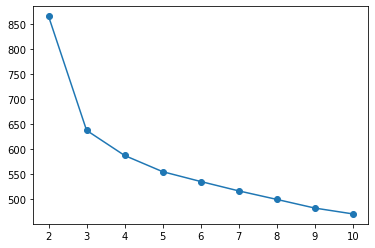

In [286]:
plt.plot(range(2,11),lst_inertia,marker='o')

In [287]:
lst_silhouette = []
for k in range(2,11):
    cl_sil = KMeans(n_clusters=k)
    cl_sil.fit(Xs)
    lst_silhouette.append(silhouette_score(Xp,cl_sil.predict(Xs)))

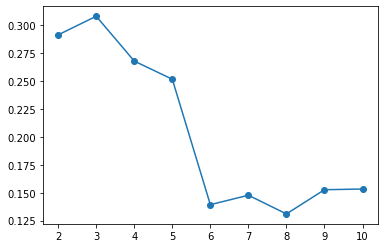

In [288]:
plt.plot(range(2,11),lst_silhouette,marker='o')

In [289]:
lst_dbscore=[]
for k in range(2,11):
    cl_db = KMeans(n_clusters=k)
    cl_db.fit(Xs)
    lst_dbscore.append(davies_bouldin_score(Xp,cl_db.predict(Xs)))


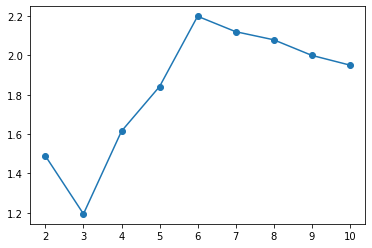

In [290]:
plt.plot(range(2,11),lst_dbscore,marker='o')

In [271]:
cluster = KMeans(n_clusters=3, random_state=1,n_init=25)

In [294]:
X["cl"] = Xp["cl"] = Xs['cl'] =cluster.fit_predict(Xp)

In [295]:
X[['attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'defense',
       'experience_growth', 'height_m', 'hp', 'percentage_male', 'sp_attack',
       'sp_defense', 'speed', 'weight_kg', 'generation', 'is_legendary',
       'abilities_num','cl']].groupby("cl").mean().style.background_gradient(cmap='Blues')

,attack,base_egg_steps,base_happiness,base_total,defense,experience_growth,height_m,hp,percentage_male,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary,abilities_num
cl,,,,,,,,,,,,,,,,
0,86.613588,5668.959660,67.239915,467.333333,80.176221,1040850.700637,1.301068,74.535032,55.280467,77.940552,77.295117,70.772824,64.853629,3.628450,0.000000,2.513800
1,108.958333,25831.111111,38.125000,613.500000,99.277778,1242077.500000,2.260610,95.416667,6.250000,113.236111,101.694444,94.916667,194.966363,4.625000,0.972222,1.430556
2,53.193798,4767.751938,69.534884,305.596899,52.593023,1028610.310078,0.607408,51.395349,47.625581,47.492248,50.666667,50.255814,17.752809,3.542636,0.000000,2.709302


In [296]:
X["cl"].value_counts(1)

0    0.588015
2    0.322097
1    0.089888
Name: cl, dtype: float64

In [300]:
Xp['cl'] = Xp['cl'].astype(str)

In [301]:
Xp.iplot(kind='scatter',x='pca_comp_1',y='pca_comp_2',mode='markers',size=3,categories='cl')

C:\ProgramData\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:807: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\ProgramData\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:810: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



<AxesSubplot:xlabel='pca_comp_1', ylabel='pca_comp_2'>

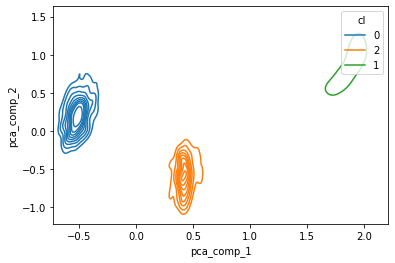

In [302]:
plt.figure()
sns.kdeplot(data=Xp,x='pca_comp_1',y='pca_comp_2',fill=False,hue='cl')